![](images/EscUpmPolit_p.gif "UPM")

# Course Notes for Learning Intelligent Systems

Department of Telematic Engineering Systems, Universidad Politécnica de Madrid, © Carlos A. Iglesias

## [Introduction to Machine Learning II](3_0_0_Intro_ML_2.ipynb)

# Exercise 2 - The Titanic Dataset

In this exercise, we are going to put in practice what we have learnt in the notebooks of the session. 

In the previous notebook we have been applying the SVM machine learning algorithm.

Your task is to apply other machine learning algorithms (at least 2) that you have seen in theory or others you are interested in.

You should compare the algorithms and describe your experiments.

## Licence

The notebook is freely licensed under under the [Creative Commons Attribution Share-Alike license](https://creativecommons.org/licenses/by/2.0/).  

© Carlos A. Iglesias, Universidad Politécnica de Madrid.

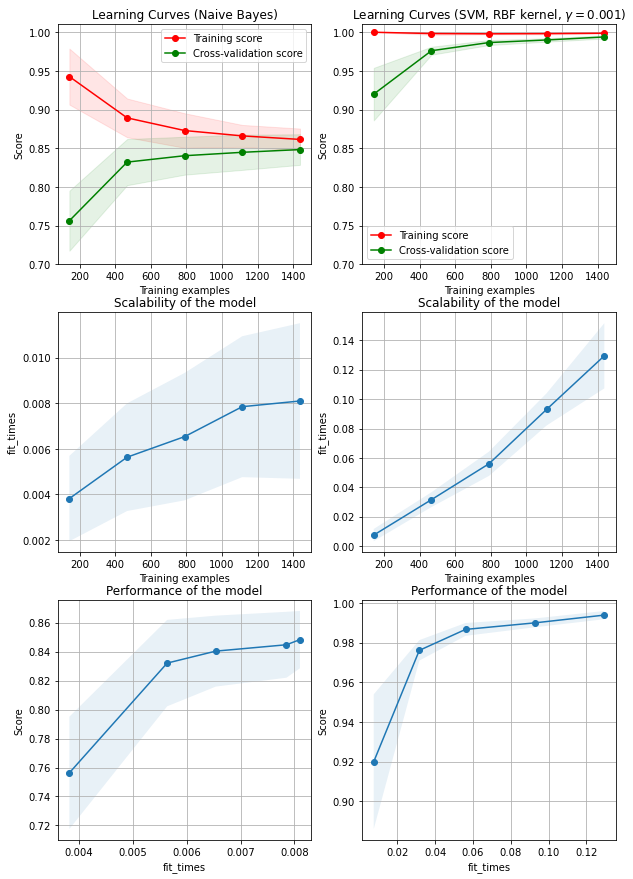

In [1]:
# General import and load data
import pandas as pd
import numpy as np

from pandas import Series, DataFrame

# Training and test spliting
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Estimators
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier


# Evaluation
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Optimization
from sklearn.model_selection import GridSearchCV

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

import plot_learning_curve, plot_svm

# if matplotlib is not set inline, you will not see plots
# alternatives auto gtk gtk2 inline osx qt qt5 wx tk
# %matplotlib auto
# %matplotlib qt
# %matplotlib inline
# %run plot_learning_curve

In [2]:
#We get a URL with raw content (not HTML one)
url="https://raw.githubusercontent.com/gsi-upm/sitc/master/ml2/data-titanic/train.csv"
df = pd.read_csv(url)
df.head()


#Fill missing values
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Sex'].fillna('male', inplace=True)
df['Embarked'].fillna('S', inplace=True)

# Encode categorical variables
df['Age'] = df['Age'].fillna(df['Age'].median())
df.loc[df["Sex"] == "male", "Sex"] = 0
df.loc[df["Sex"] == "female", "Sex"] = 1
df.loc[df["Embarked"] == "S", "Embarked"] = 0
df.loc[df["Embarked"] == "C", "Embarked"] = 1
df.loc[df["Embarked"] == "Q", "Embarked"] = 2

# Drop colums
df.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

#Show proprocessed df
df.head()

df['Sex'] = df['Sex'].astype(np.int64)
df['Embarked'] = df['Embarked'].astype(np.int64)


In [3]:
# Features of the model
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
# Transform dataframe in numpy arrays
X = df[features].values
y = df['Survived'].values



# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

# Preprocess: normalize
#scaler = preprocessing.StandardScaler().fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

# Naive Bayes model

In [4]:
# Create Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
expected = y_test

# Accuracy
metrics.accuracy_score(expected, predicted)



0.8161434977578476

In [5]:
# Confusion matrix
print(metrics.confusion_matrix(expected, predicted))
# Report
print(classification_report(expected, predicted))

[[115  19]
 [ 22  67]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       134
           1       0.78      0.75      0.77        89

    accuracy                           0.82       223
   macro avg       0.81      0.81      0.81       223
weighted avg       0.82      0.82      0.82       223



# KNeighbors model

In [6]:
# Create KNeighbors model
model = KNeighborsClassifier()

model.fit(X_train, y_train)
predicted = model.predict(X_test)
expected = y_test

# Accuracy
metrics.accuracy_score(expected, predicted)


0.6636771300448431

In [7]:
# Confusion matrix
print(metrics.confusion_matrix(expected, predicted))
# Report
print(classification_report(expected, predicted))

[[105  29]
 [ 46  43]]
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       134
           1       0.60      0.48      0.53        89

    accuracy                           0.66       223
   macro avg       0.65      0.63      0.64       223
weighted avg       0.66      0.66      0.66       223



# Decision Tree Classifier Model

In [8]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier(criterion="entropy")

model.fit(X_train, y_train)
predicted = model.predict(X_test)
expected = y_test

# Accuracy
metrics.accuracy_score(expected, predicted)



0.8071748878923767

In [9]:
# Confusion matrix
print(metrics.confusion_matrix(expected, predicted))
# Report
print(classification_report(expected, predicted))

[[117  17]
 [ 26  63]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       134
           1       0.79      0.71      0.75        89

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223



# Conclusions: 
As we can see, we obtain different results applying other algorithms. In all cases, the results are enough good (higher than 60%) to conclude the model can be used.

We can obtain better accuracy in each model by applying optimizers or structuring the data in others forms.
